In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import itertools

In [3]:
df_train = pd.read_csv('./anomaly_detection_dataset_2022/trainset.csv')
df_anomaly = pd.read_csv('./anomaly_detection_dataset_2022/anomaly_testset1.csv')

df_train['created_at'] = pd.to_datetime(df_train['created_at'])
df_anomaly['created_at'] = pd.to_datetime(df_anomaly['created_at'])

# The 'created_at' column is a Timestamp and the `scaler` below will complain.
# Consider doing feature extraction on the 'created_at' column, for instance, getting 
# the hour, seconds, and date of each row and putting them as a new column?
# For now, I will ignore this column.
df_train = df_train.drop(columns=['created_at'])
df_anomaly = df_anomaly.drop(columns=['created_at'])

In [4]:
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(df_train)

In [5]:
# k-means
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_train_data)
df_train['cluster'] = clusters

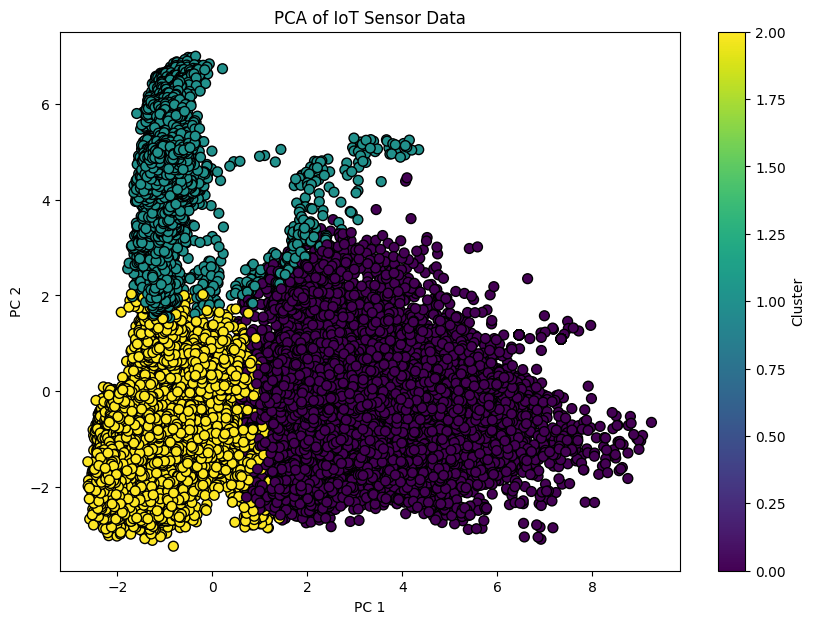

In [6]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_train_data)

plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_train['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA of IoT Sensor Data')
plt.colorbar(label='Cluster')
plt.show()

In [57]:
distances = kmeans.transform(scaled_train_data)
df_train['distance_to_center'] = np.min(distances, axis=1)
threshold = np.percentile(df_train['distance_to_center'], 95)
df_train['anomaly'] = df_train['distance_to_center'] > threshold


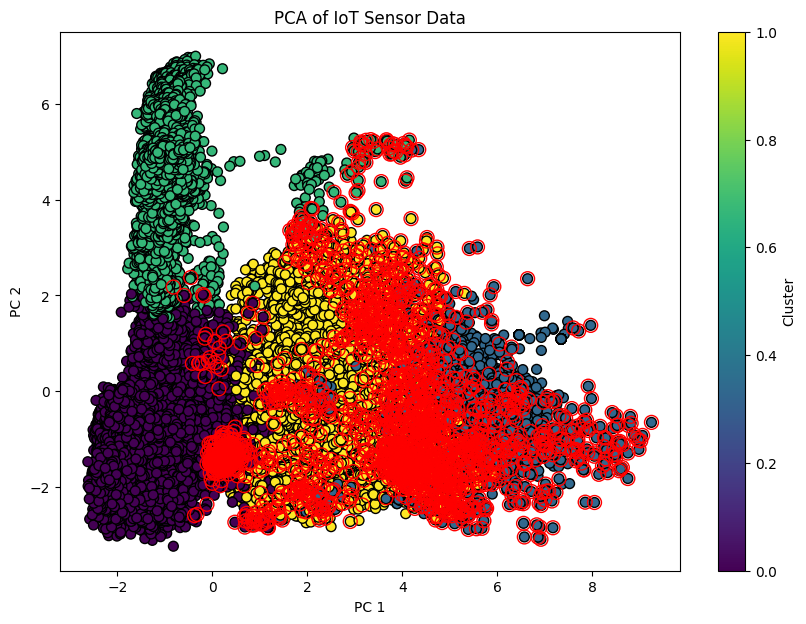

In [58]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_train_data)

plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_train['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(pca_data[df_train['anomaly'], 0], pca_data[df_train['anomaly'], 1], facecolors='none', edgecolors='r', s=100, label='Anomaly')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA of IoT Sensor Data')
plt.colorbar(label='Cluster')
plt.show()